<a href="https://colab.research.google.com/github/lojedaa/Talleres-Ciencia-de-Datos/blob/main/Taller_1/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** Hotel bookings [[dataset](https://drive.google.com/file/d/1VA3XyONx5mFEzx1YN_ZsPAkEMWXuRBqI/view?usp=sharing) | [dictionary](https://docs.google.com/spreadsheets/d/1p-lHMlXSUAYdP19odh3AqqkowHRWfWSHWXCURqMOmCc/edit?usp=sharing)].


Última actuaización: Septiembre, 2025

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

### 1. Entendimiento inicial de datos

In [3]:
hotel_file_url = 'https://raw.githubusercontent.com/lojedaa/Talleres-Ciencia-de-Datos/refs/heads/main/Taller_1/hotel_bookings_modified.csv'
hotel_dict_url = 'https://raw.githubusercontent.com/lojedaa/Talleres-Ciencia-de-Datos/refs/heads/main/Taller_1/hotel_dictionary.csv'

hotel_df = pd.read_csv(hotel_file_url, low_memory=False)
hotel_dict = pd.read_csv(hotel_dict_url, sep=',', header=0)

In [4]:
# Crear diccionario de tipos
varType = dict(zip(hotel_dict['Field'], hotel_dict['Type']))

# Función para convertir tipos
def Type_convert(var_type):
    if var_type == 'integer':
        return 'Int64'
    elif var_type == 'numeric':
        return 'float'
    elif var_type == 'text':
        return 'string'
    elif var_type == 'boolean':
        return 'boolean'
    elif var_type == 'date':
        return 'datetime64[ns]'
    else:
        return None  # tipo desconocido

In [5]:
# Aplicar conversión de tipos
for col, tipo in varType.items():
    tipo_convertido = Type_convert(tipo)
    if tipo_convertido == 'datetime64[ns]':
        hotel_df[col] = pd.to_datetime(hotel_df[col], errors='coerce')
    elif tipo_convertido == 'Int64':
        hotel_df[col] = pd.to_numeric(hotel_df[col], errors='coerce').astype('Int64')
    elif tipo_convertido:
        hotel_df[col] = hotel_df[col].astype(tipo_convertido)



In [6]:
# Showing dataframe dimensions
hotel_df.shape

(58895, 33)

In [7]:
# Showing column types
hotel_df.dtypes

,0
hotel,string[python]
is_canceled,boolean
lead_time,Int64
arrival_date_year,Int64
arrival_date_month,string[python]
arrival_date_week_number,Int64
arrival_date_day_of_month,Int64
stays_in_weekend_nights,Int64
stays_in_week_nights,Int64
adults,Int64


In [8]:
hotel_df.sample(10) # Showing a sample of 10 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
33815,Resort Hotel,False,163,2017,February,9,28,0,5,1,0,0,BB,FRA,Online TA,TA/TO,False,0,0,A,F,2,No Deposit,240,<NA>,0,Transient-Party,37.00,0,0,Check-Out,2017-03-05,NaN
51726,City Hotel,True,158,2016,May,22,24,0,2,1,0,0,BB,PRT,Groups,TA/TO,False,0,0,A,A,0,Non Refund,37,<NA>,31,Transient,130.00,0,0,Canceled,2016-01-18,NaN
11952,Resort Hotel,True,318,2017,June,23,5,1,1,2,0,0,BB,PRT,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,242,<NA>,0,Transient,74.25,0,2,Canceled,2017-01-06,NaN
24161,Resort Hotel,False,123,2016,May,20,9,1,4,2,1,0,BB,GBR,Online TA,TA/TO,False,0,0,A,A,1,No Deposit,240,<NA>,0,Transient,75.52,0,2,Check-Out,2016-05-14,NaN
8137,Resort Hotel,True,0,2016,September,38,14,0,1,2,0,0,BB,PRT,Direct,Direct,False,0,0,F,F,0,No Deposit,<NA>,<NA>,0,Transient,8.00,0,0,Canceled,2016-09-14,NaN
56967,City Hotel,True,422,2016,September,38,16,0,2,2,0,0,BB,PRT,Groups,TA/TO,False,0,0,A,A,0,No Deposit,1,<NA>,379,Transient-Party,65.00,0,0,Canceled,2016-08-22,NaN
38594,Resort Hotel,False,9,2017,July,29,21,0,2,2,2,0,BB,ESP,Direct,Direct,False,0,0,C,C,0,No Deposit,250,<NA>,0,Transient,256.50,1,0,Check-Out,2017-07-23,NaN
10491,Resort Hotel,True,125,2017,March,10,9,2,4,2,0,0,BB,PRT,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,240,<NA>,0,Transient,42.00,0,2,Canceled,2017-01-01,NaN
49703,City Hotel,False,106,2016,April,17,17,2,2,2,0,0,BB,DEU,Online TA,TA/TO,False,0,0,D,D,0,No Deposit,9,<NA>,0,Transient,90.95,0,1,Check-Out,2016-04-21,NaN
14903,Resort Hotel,True,237,2015,August,35,27,2,6,2,0,0,BB,PRT,Online TA,TA/TO,False,3,0,A,A,0,No Deposit,240,<NA>,0,Transient,88.98,0,1,Canceled,2015-04-04,NaN


### 1.1. Análisis univariado

In [9]:
def univariate_summary(df, column):
    """Generate comprehensive univariate summary for a column"""
    print(f"\n{'='*50}")
    print(f"UNIVARIATE ANALYSIS: {column}")
    print(f"{'='*50}")

    # Basic info
    print(f"Data type: {df[column].dtype}")
    print(f"Total values: {len(df[column])}")
    print(f"Missing values: {df[column].isnull().sum()} ({df[column].isnull().mean()*100:.2f}%)")
    print(f"Unique values: {df[column].nunique()}")

    if df[column].dtype in ['Int64', 'float']:
        # Numerical analysis
        print(f"\n--- Numerical Statistics ---")
        print(df[column].describe())
        print(f"Skewness: {df[column].skew():.3f}")
        print(f"Kurtosis: {df[column].kurtosis():.3f}")

    elif df[column].dtype == 'object' or df[column].nunique() < 15:
        # Categorical analysis
        print(f"\n--- Frequency Distribution ---")
        print(df[column].value_counts())
        print(f"\n--- Percentage Distribution ---")
        print(df[column].value_counts(normalize=True) * 100)

# Example usage
univariate_summary(hotel_df, 'hotel')
univariate_summary(hotel_df, 'customer_type')
univariate_summary(hotel_df, 'distribution_channel')
univariate_summary(hotel_df, 'assigned_room_type')
univariate_summary(hotel_df, 'arrival_date_month')
univariate_summary(hotel_df, 'is_canceled')



UNIVARIATE ANALYSIS: hotel
Data type: string
Total values: 58895
Missing values: 0 (0.00%)
Unique values: 2

--- Frequency Distribution ---
hotel
Resort Hotel    40063
City Hotel      18832
Name: count, dtype: Int64

--- Percentage Distribution ---
hotel
Resort Hotel    68.02445
City Hotel      31.97555
Name: proportion, dtype: Float64

UNIVARIATE ANALYSIS: customer_type
Data type: string
Total values: 58895
Missing values: 589 (1.00%)
Unique values: 4

--- Frequency Distribution ---
customer_type
Transient          42430
Transient-Party    13078
Contract            2486
Group                312
Name: count, dtype: Int64

--- Percentage Distribution ---
customer_type
Transient          72.771241
Transient-Party    22.429939
Contract            4.263712
Group               0.535108
Name: proportion, dtype: Float64

UNIVARIATE ANALYSIS: distribution_channel
Data type: string
Total values: 58895
Missing values: 0 (0.00%)
Unique values: 5

--- Frequency Distribution ---
distribution_chann

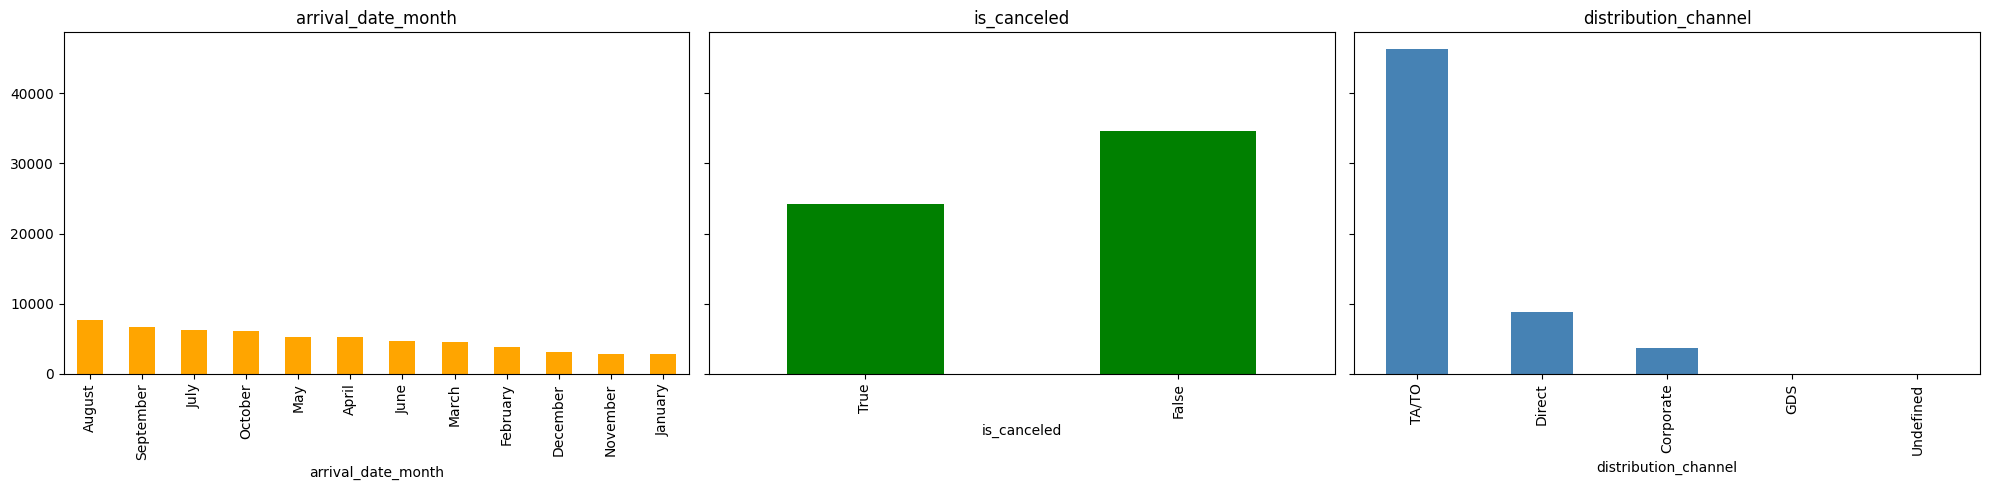

In [10]:
# Plotting bar charts for arrival_date_month and is_canceled and distribution_channel
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 5))
hotel_df["arrival_date_month"].value_counts().plot(kind="bar", ax=ax1, color="orange")
hotel_df["is_canceled"].value_counts().sort_index(ascending=False).plot(kind="bar", ax=ax2, color="green")
hotel_df["distribution_channel"].value_counts().plot(kind="bar", ax=ax3, color="steelblue")
ax1.set_title("arrival_date_month")
ax2.set_title("is_canceled")
ax3.set_title("distribution_channel")
plt.tight_layout()
plt.show()

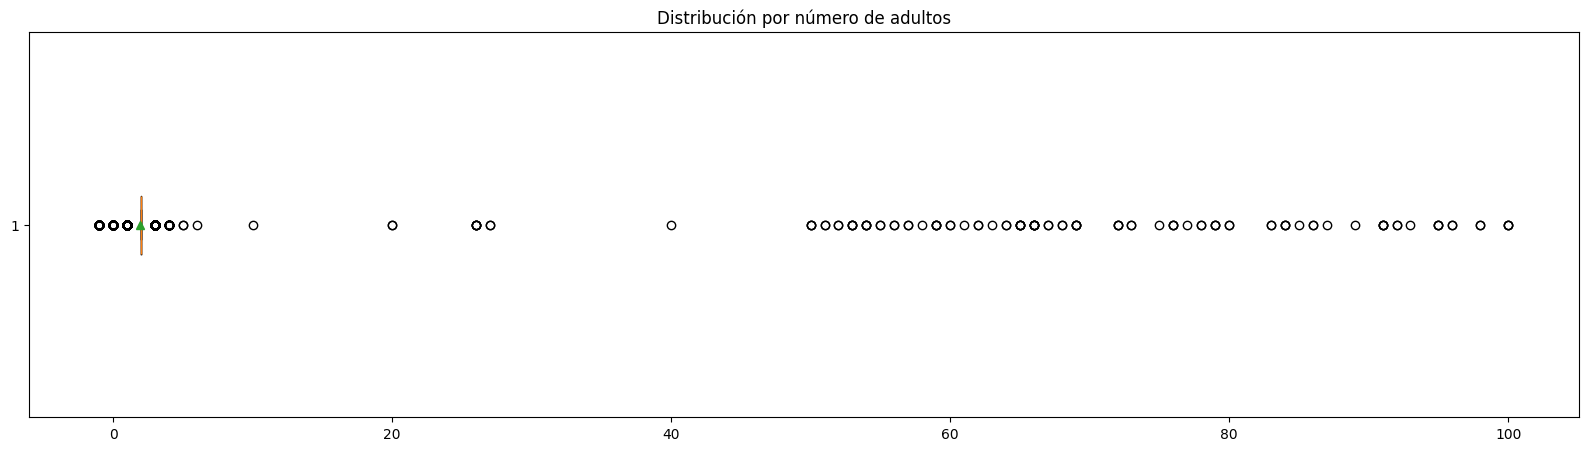

In [11]:
# Armando un boxplot para distribución por número de adultos
plt.figure(figsize=(20, 5))
plt.boxplot(hotel_df["adults"], showmeans=True, vert=False)
plt.title("Distribución por número de adultos")
plt.show()

### 2. Estrategia de Análisis

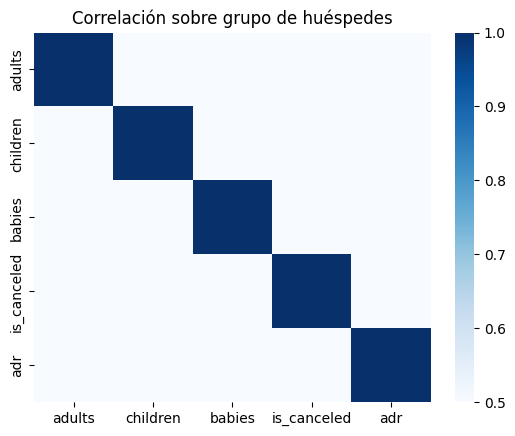

In [12]:
# Plotting correlation heatmap sobre grupo huéspedes
sns.heatmap(
    hotel_df[["adults", "children", "babies", "is_canceled","adr"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlación sobre grupo de huéspedes")
plt.show()